Import CSV and Libaries

In [ ]:
import pandas as pd
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None  # default='warn'

#Convert CSV to Dataframe
data = pd.read_csv("./data/iou-dsc.csv", header=[0])
data

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
0,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,0.6511,2.1214,24000,0,44100,bird,11.652,admin,NaN,NaN
1,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,12.6092,3.1042,24000,0,44100,bird,11.654,admin,NaN,NaN
2,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,14.1490,1.3842,24000,0,44100,bird,33.147,nelly,NaN,NaN
3,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,1.1590,1.3760,24000,0,44100,bird,33.150,nelly,NaN,NaN
4,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,1.1622,0.6098,24000,0,44100,bird,166.323,edmundo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,4.3832,0.0527,24000,0,44100,bird,95.519,edmundo,NaN,NaN
73,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,3.2886,0.5116,24000,0,44100,bird,95.504,edmundo,NaN,NaN
74,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,3.7851,0.5643,24000,0,44100,bird,95.522,edmundo,NaN,NaN
75,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,2.7602,1.7457,24000,0,44100,bird,57.017,ryan,NaN,NaN


In [ ]:
 #https://www.adamsmith.haus/python/answers/how-to-set-different-colors-for-each-series-in-a-matplotbib-scatter-plot-in-python#:~:text=Call%20iter(iterable)%20with%20iterable,as%20the%20list%20of%20colors.
#Dtaw each label on a 2d plot with start and end times as axies, color labels by the user who made them
def labels_users_plot(file_):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
  colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(users))))
  for user in users:
    user_annotations = data_oi[data_oi["LAST MOD BY"] == user]
    x = user_annotations["OFFSET"]
    y = x + user_annotations["DURATION"]
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    plt.plot(x, y, 'o', color=next(colors));

def label_clusters(file_, clusters):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
  colors = (plt.cm.rainbow(np.linspace(0, 1, max(clusters)+1)))
  i = 0
  for cluster in clusters:
    user_annotations = data_oi.iloc[i]
    i += 1
    x = user_annotations["OFFSET"]
    y = x + user_annotations["DURATION"]
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    plt.plot(x, y, 'o', color=colors[cluster]);


Testing Drawing Graph of Start and End Times

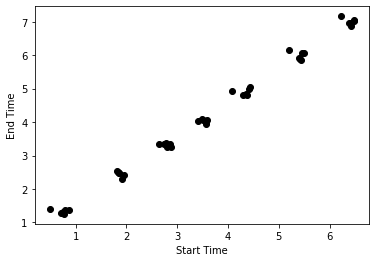

In [ ]:
data_oi = data[data["IN FILE"] == "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3"]
x = data_oi["OFFSET"]
y = x + data_oi["DURATION"]
plt.xlabel("Start Time")
plt.ylabel("End Time")
plt.plot(x, y, 'o', color='black');
#

Each user gets a unqiue color. This allows for seeing how users colored clips

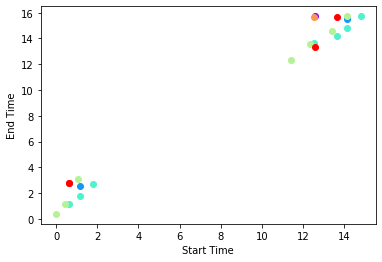

In [ ]:
labels_users_plot("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")
#This example shows two piha calls with thier precalls and then thier main call, hence the variablity of the clusters, overall we see 2 main labels

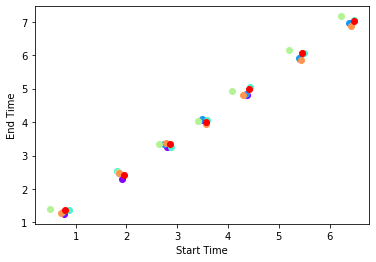

In [ ]:
labels_users_plot("XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")
#This Piha had consisent, repeating calls
#If appears this might have made things easier to label

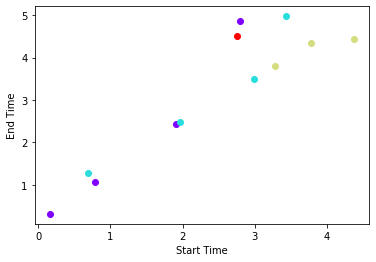

In [ ]:
labels_users_plot("XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")
#In this clip, the main variablity was the last call in the clip
#It had a precall fallowed by about a brief silence then main call
#This would be our case where users are following 2 diffrent labeling schemes:
#  -Label each syabul (resulting in the mutliple labels shown)
#  -Label each high-level call (pre + main call)

Clustering Tests!

Frist test, use density based clustering (DBSCAN) since predetermining number of clusters is difficult. Challenge is determining how to assign distance between neighborhoods.



In [ ]:

import math
from tabulate import tabulate

In [ ]:
#TODO: INVESTIGATE WHAT CLUSTERING METHOD CAN WORK
from sklearn.cluster import DBSCAN

def label_clusters_DBSCAN(file_, distance=0.5, agreement=1, x="OFFSET"):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
  model = DBSCAN(
                            eps=distance, 
                            min_samples=math.floor(len(users) * agreement), #len(users)
                            metric='euclidean',
                            metric_params=None,
                            algorithm='auto',
                            leaf_size=30,
                            p=None,
                            n_jobs=None
                          )
  data_oi = data_oi[["OFFSET", "DURATION"]]
  data_oi["END TIMES"] = data_oi["DURATION"].add(data_oi["OFFSET"], fill_value=0)
  #print(tabulate(data_oi, headers='keys', tablefmt='psql'))
  model = model.fit(data_oi[["OFFSET", "END TIMES"]])
  clusters = model.fit_predict(data_oi[["OFFSET", "DURATION"]])
  print(clusters)

  colors = (plt.cm.rainbow(np.linspace(0, 1, max(clusters)+2)))
  i = 0
  for cluster in clusters:
    user_annotations = data_oi.iloc[i]
    i += 1
    x = user_annotations["OFFSET"]
    y = x + user_annotations["DURATION"]
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    plt.plot(x, y, 'o', color=colors[cluster+1]);

[0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1]


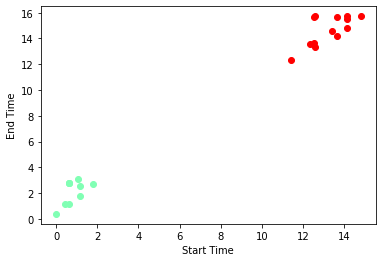

In [ ]:
label_clusters_DBSCAN("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


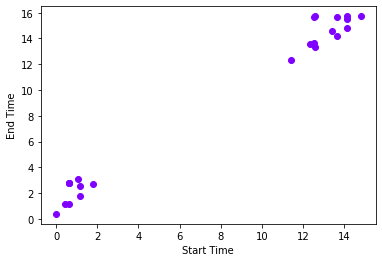

In [ ]:
label_clusters_DBSCAN("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 0.5)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


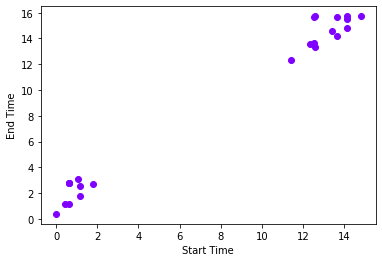

In [ ]:
label_clusters_DBSCAN("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 1/2000000000)

[4 0 1 2 6 5 3 2 0 4 1 5 6 3 0 4 1 2 5 3 6 0 2 4 1 6 5 3 2 5 6 1 0 4 3 0 4
 5 2 1 6 3]


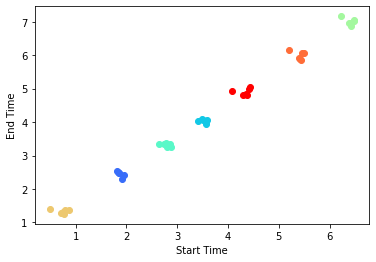

In [ ]:
label_clusters_DBSCAN("XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 0.5)

[ 0  1  2  1 -1  3  0 -1  3  3  2 -1]


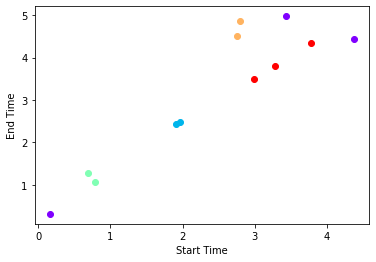

In [ ]:
label_clusters_DBSCAN("XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 0.5, agreement = 0.7)

[ 1 -1  0  1  1  0  0  0  0  1  1  1 -1  1  0 -1 -1  0 -1  1  1  0  0]


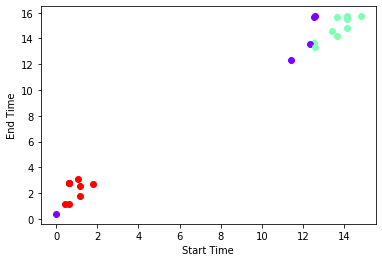

In [ ]:
label_clusters_DBSCAN("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", 1)

Summary of Results:

- DBCAN could be used to segement very obvious clips
- Struggles with different distances between labels at times ie setting max distance for 2 vs 1 in the frist clip

Possible solutions
- A different clustering algorithm?
- Based on distance apart from clusters somehow, maybe set neighborhood limit to half of user annotions?

Next test, attempt at KMeans.

Build a genertic test method that can take in any given clustering model and run the same test

In [ ]:
from sklearn.cluster import KMeans
def label_clusters(model_builder, file_, distance=1/2, agreement=1):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
 
  data_oi["END TIMES"] = data_oi["DURATION"].add(data_oi["OFFSET"], fill_value=0)
  #print(tabulate(data_oi, headers='keys', tablefmt='psql'))

  model = model_builder(data = data_oi, distance = distance, users = users, agreement = agreement)
  model = model.fit(data_oi[["OFFSET", "END TIMES"]])
  clusters = model.fit_predict(data_oi[["OFFSET", "END TIMES"]])
  data_oi["cluster"] = clusters
  print(clusters)

  adv_cluster_count = 0
  adv_num_unique_users = 0 
  for i in range(max(clusters)):
     temp = data_oi[data_oi["cluster"] == i]
     adv_cluster_count += len(temp)
     adv_num_unique_users += len(pd.unique(temp['LAST MOD BY']))
  adv_cluster_count /= max(clusters)
  adv_num_unique_users /=  max(clusters)
  print("adverage cluster size: ", adv_cluster_count)
  print("adverage unqiue users per cluster size: ", adv_num_unique_users)


  colors = (plt.cm.rainbow(np.linspace(0, 1, max(clusters)+2)))
  i = 0
  for cluster in clusters:
    user_annotations = data_oi.iloc[i]
    i += 1
    x = user_annotations["OFFSET"]
    y = x + user_annotations["DURATION"]
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    plt.plot(x, y, 'o', color=colors[cluster+1]);


def DBSCAN_builder(data = None, distance = 0.5, users = None, agreement = 0.5):
    return DBSCAN(
                    eps=distance, 
                    min_samples=math.floor(len(users) * agreement), #len(users)
                    metric='euclidean',
                    metric_params=None,
                    algorithm='auto',
                    leaf_size=30,
                    p=None,
                    n_jobs=None
                  )
    
def KMEANS_builder(data = None, distance = 0.5, users = None, agreement = 0.5):
    n = 0
    for i in range(len(users)):
      n += len(data[data['LAST MOD BY'] == users[i]])
    n = math.ceil(n/len(users))
    print("number of clusters")
    print(n)
    return KMeans(n_clusters=n, random_state=0)

number of clusters
7
[0 5 6 3 1 4 2 3 5 0 6 4 1 2 5 0 6 3 4 2 1 5 3 0 6 1 4 2 3 4 1 6 5 0 2 5 0
 4 3 6 1 2]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0


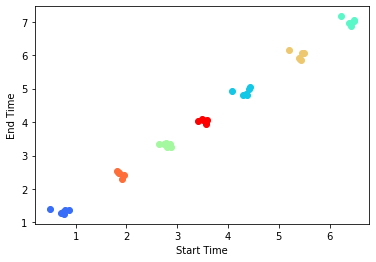

In [ ]:
label_clusters(KMEANS_builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0


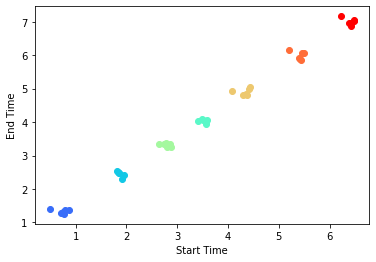

In [ ]:
label_clusters(DBSCAN_builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

number of clusters
4
[0 1 1 0 0 2 1 1 1 3 0 3 2 0 1 2 3 1 1 0 0 2 1]
adverage cluster size:  6.666666666666667
adverage unqiue users per cluster size:  5.0


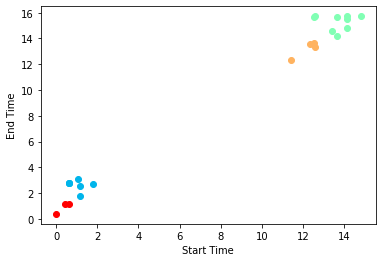

In [ ]:
label_clusters(KMEANS_builder, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3",  distance = 1/2)

number of clusters
3
[2 1 0 1 0 0 2 0 0 0 0 1]
adverage cluster size:  5.0
adverage unqiue users per cluster size:  3.0


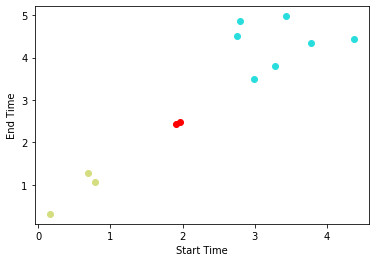

In [ ]:
label_clusters(KMEANS_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

KMEANS: 
- great when users label the same amount
- fails with mutli labels despite attempts to handle that
- Stick to density based clustering

Next test: take the median distance between each user's annotations (therefore a center of how spaced apart the bird calls were) and factor by some scalar (1/3) in this case to create a distance for neighborhoods
- Possible limitation going into mutliclass species labels, we will look at that possiblity later

In [ ]:
import statistics
def distance_cal(s1,e1,s2,e2):
  return math.sqrt((s2 - s1) * (s2 - s1) + (e2 - e1) * (e2 - e1) )

def DBSCAN_auto_dis_builder(data = None, distance = 1/3, users = None, agreement = 0.5):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      skip = True
      for index, row in user_labels.iterrows():
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        if (not skip):
          dists.append(distance_cal(s1,e1,s2,e2))
        skip = False
        s1 = s2
        e1 = e2
      adv_distance.extend(dists)
    adv_distance = statistics.median(adv_distance) * NEIGHBORHOOD_SCALAR #
    print(adv_distance/NEIGHBORHOOD_SCALAR, adv_distance)
    return DBSCAN(
                    eps=adv_distance, 
                    min_samples=1
                  )

1.6324079807882785 0.8162039903941393
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0


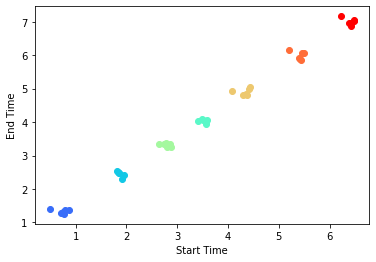

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

15.92258385061922 7.96129192530961
[0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1]
adverage cluster size:  10.0
adverage unqiue users per cluster size:  6.0


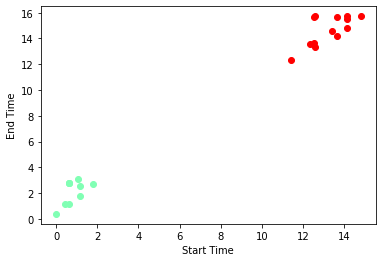

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

1.6644922267135294 0.8322461133567647
[0 1 2 1 2 2 0 2 2 2 2 3]
adverage cluster size:  3.6666666666666665
adverage unqiue users per cluster size:  2.6666666666666665


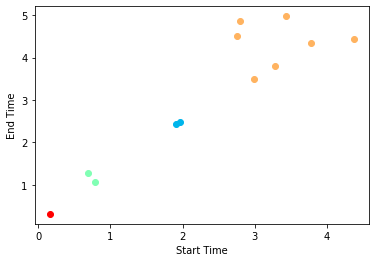

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")


Seems to work decently well given an aritbary scalar factor of 1/3. Could possiblity consider an alternative means of determining neighborhood distances but the proof of concept seems to do well here.

Possible next steps:
We need to figure out determining what mertic is needed to determine a poorly annotated clip based on clustering. Some possible meterics are:

- Adverage number of annotations in a cluster
- Adverage number of unqiue users in a cluster
- size of cluster

Given our examples, we obsreve that the fewer annotations in the same cluster compared to the number of annotators is more likely a bad annotation and one that should be flagged for review (see previous graph) whereas the "better" labeled annotations have more annotations than users. We also see that better clusters have more unqiue users per clip. These meterics need little post processing compared to the pairwise_IOU mertics for determining clip accuratcy.



In [ ]:
##Experiments in Redefine clustering system to consider if a annotation is longer or shorter than most
def label_clusters(model_builder, file_, neighbor_distance_scale=1/3, agreement=1, min_duration = 0, line=True, min=False):
  data_oi = data[data["IN FILE"] == file_]
  data_oi = data_oi[data_oi["DURATION"] > min_duration]
  users = data_oi["LAST MOD BY"].unique()
 
  data_oi["END TIMES"] = data_oi["DURATION"].add(data_oi["OFFSET"], fill_value=0)
  #print(tabulate(data_oi, headers='keys', tablefmt='psql'))

  model = model_builder(data = data_oi, users = users, distance = neighbor_distance_scale, agreement = agreement)
  clusters = model.fit_predict(data_oi[["OFFSET", "END TIMES"]])
  print(clusters)
  data_oi["cluster"] = clusters
  print(clusters)

  adv_cluster_count = 0
  adv_num_unique_users = 0 
  for i in range(max(clusters)):
     temp = data_oi[data_oi["cluster"] == i]
     adv_cluster_count += len(temp)
     adv_num_unique_users += len(pd.unique(temp['LAST MOD BY']))
  adv_cluster_count /= max(clusters)
  adv_num_unique_users /=  max(clusters)
  print("adverage cluster size: ", adv_cluster_count)
  print("adverage unqiue users per cluster size: ", adv_num_unique_users)
  print("Total Users: ", len(users))


  colors = (plt.cm.rainbow(np.linspace(0, 1, max(clusters)+2)))
  if(line):
    line_x = x = np.linspace(0, max(data_oi["OFFSET"]), 1000)
    line_y = 1
    print("slope:",line_y)
    plt.plot(line_x, line_y * line_x)
  i = 0
  for cluster in clusters:
    user_annotations = data_oi.iloc[i]
    i += 1
    x = user_annotations["OFFSET"]
    y = user_annotations["END TIMES"]
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    plt.plot(x, y, 'o', color=colors[cluster+1]);


1.6644922267135294 0.5548307422378431
[0 1 2 1 3 4 0 5 4 6 2 7]
[0 1 2 1 3 4 0 5 4 6 2 7]
adverage cluster size:  1.5714285714285714
adverage unqiue users per cluster size:  1.5714285714285714
Total Users:  4
slope: 1


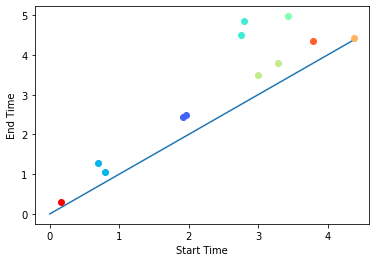

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

1.6644922267135294 0.5548307422378431
[0 1 2 1 3 4 0 4 5 2]
[0 1 2 1 3 4 0 4 5 2]
adverage cluster size:  1.8
adverage unqiue users per cluster size:  1.8
Total Users:  4
slope: 1


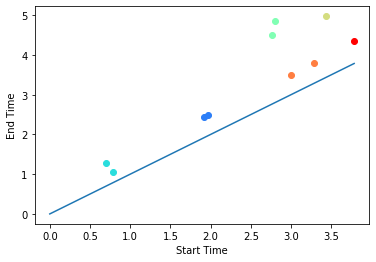

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0.25, neighbor_distance_scale=1/3)

1.6644922267135294 1.6644922267135294
[0 1 0 1 0 0 0 0 0 0]
[0 1 0 1 0 0 0 0 0 0]
adverage cluster size:  8.0
adverage unqiue users per cluster size:  4.0
Total Users:  4
slope: 1


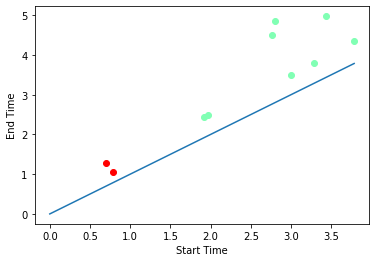

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0.25, neighbor_distance_scale=1)

1.6644922267135294 0.9986953360281176
[0 1 2 1 2 2 0 2 2 2]
[0 1 2 1 2 2 0 2 2 2]
adverage cluster size:  2.0
adverage unqiue users per cluster size:  2.0
Total Users:  4
slope: 1


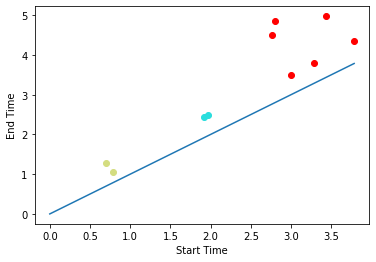

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0.25, neighbor_distance_scale=0.6)

1.6324079807882785 0.9794447884729671
[0 1 2 2 3 4 5 2 1 0 2 4 3 5 1 0 2 2 4 5 3 1 2 0 2 3 4 5 2 4 3 2 1 0 5 1 0
 4 2 2 3 5]
[0 1 2 2 3 4 5 2 1 0 2 4 3 5 1 0 2 2 4 5 3 1 2 0 2 3 4 5 2 4 3 2 1 0 5 1 0
 4 2 2 3 5]
adverage cluster size:  7.2
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


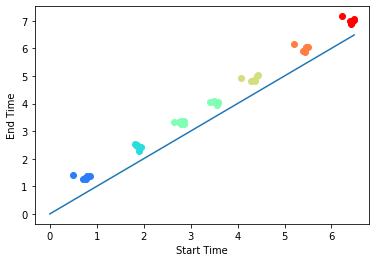

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0.25, neighbor_distance_scale=0.6)

15.92258385061922 9.553550310371532
[0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1]
[0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1]
adverage cluster size:  10.0
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


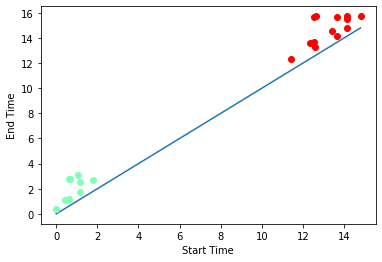

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0.25, neighbor_distance_scale=0.6)

1.6644922267135294 0.9986953360281176
[0 1 2 1 2 2 0 2 2 2 2 1]
[0 1 2 1 2 2 0 2 2 2 2 1]
adverage cluster size:  2.5
adverage unqiue users per cluster size:  2.0
Total Users:  4
slope: 1


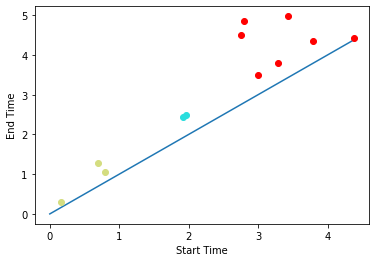

In [ ]:
label_clusters(DBSCAN_auto_dis_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=0.6)

In [ ]:
def DBSCAN_auto_dis_builder_min_dis(data = None, distance = 1, users = None, agreement = 0.5):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    dists_raw = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      skip = True
      for index, row in user_labels.iterrows():
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        dist = distance_cal(s1,e1,s2,e2)
        if (not skip):
          dists_raw.append(dist)
        
        skip = False
        s1 = s2
        e1 = e2
      adv_distance.extend(dists_raw)
    adv_distance = min(adv_distance) * NEIGHBORHOOD_SCALAR #
    print(adv_distance/NEIGHBORHOOD_SCALAR, adv_distance)
    return DBSCAN(
                    eps=adv_distance, 
                    min_samples=1
                  )

0.7403599732562529 0.7403599732562529
[0 1 2 1 2 2 0 2 2 2 2 3]
[0 1 2 1 2 2 0 2 2 2 2 3]
adverage cluster size:  3.6666666666666665
adverage unqiue users per cluster size:  2.6666666666666665
Total Users:  4
slope: 1


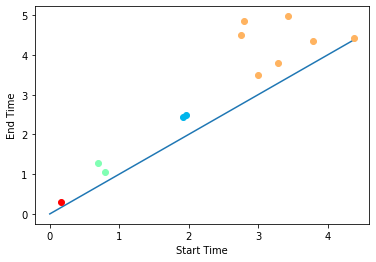

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=1/50, neighbor_distance_scale=1)

0.9791088856710474 0.9791088856710474
[0 1 2 2 3 4 5 2 1 0 2 4 3 5 1 0 2 2 4 5 3 1 2 0 2 3 4 5 2 4 3 2 1 0 5 1 0
 4 2 2 3 5]
[0 1 2 2 3 4 5 2 1 0 2 4 3 5 1 0 2 2 4 5 3 1 2 0 2 3 4 5 2 4 3 2 1 0 5 1 0
 4 2 2 3 5]
adverage cluster size:  7.2
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


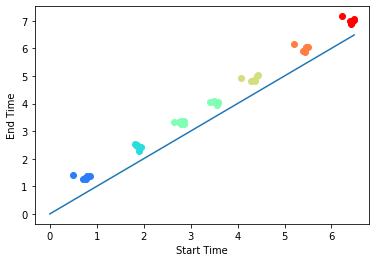

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=1)

0.9791088856710474 0.8811979971039426
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


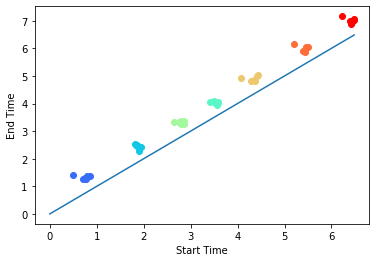

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=0.9)

0.8166798944506968 0.8166798944506968
[0 1 2 0 0 3 2 2 2 0 0 0 4 0 2 3 5 2 1 0 0 3 2]
[0 1 2 0 0 3 2 2 2 0 0 0 4 0 2 3 5 2 1 0 0 3 2]
adverage cluster size:  4.4
adverage unqiue users per cluster size:  3.2
Total Users:  6
slope: 1


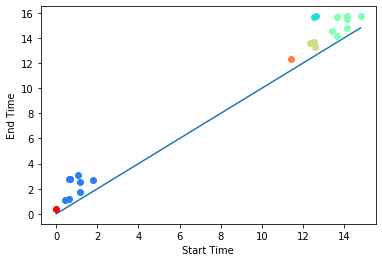

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=1)

0.9791088856710474 0.4895544428355237
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


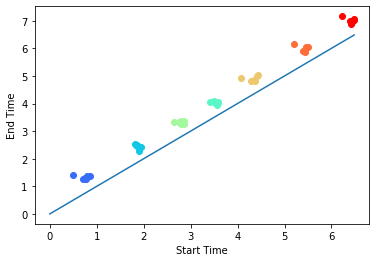

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=1/2)


0.8166798944506968 0.4083399472253484
[ 0  1  2  3  4  5  6  7  8  9 10  9 11 12 13  5 14  2  1  0  0  5 15]
[ 0  1  2  3  4  5  6  7  8  9 10  9 11 12 13  5 14  2  1  0  0  5 15]
adverage cluster size:  1.4666666666666666
adverage unqiue users per cluster size:  1.4666666666666666
Total Users:  6
slope: 1


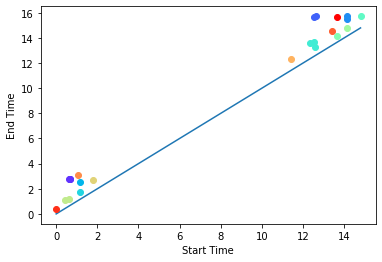

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", min_duration=0, neighbor_distance_scale=1/2)

TODO:

- Look at using duration to adjust neighborhood size?
- Look at creating ground truth generalized labels via max min start end times of a given cluster
- Have the label_clusters script output pandas with cluster data attached
- Start building a system to try to determine when a clip needs more annotations

TODO:
- Study needs of this problem
- Try to find others cluster 
- Try users over time 
- Other features

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth, OPTICS
def MeanShift_Builder(data = None, distance = 1, users = None, agreement = 0.5):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    dists_raw = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      skip = True
      for index, row in user_labels.iterrows():
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        dist = distance_cal(s1,e1,s2,e2)
        if (not skip):
          dists_raw.append(dist)
        
        skip = False
        s1 = s2
        e1 = e2
      adv_distance.extend(dists_raw)
    adv_distance = min(adv_distance) #
    print(adv_distance, adv_distance * 0.9)

    bandwidth_estimated = estimate_bandwidth(data[["OFFSET", "END TIMES"]],quantile=0.1)
    print(bandwidth_estimated)
    return MeanShift(bandwidth=adv_distance)



0.9791088856710474 0.8811979971039426
0.14726584051300826
[5 4 0 0 3 2 1 0 4 5 0 2 3 1 4 5 0 0 2 1 3 4 0 5 0 3 2 1 0 2 3 0 4 5 1 4 5
 2 0 0 3 1]
[5 4 0 0 3 2 1 0 4 5 0 2 3 1 4 5 0 0 2 1 3 4 0 5 0 3 2 1 0 2 3 0 4 5 1 4 5
 2 0 0 3 1]
adverage cluster size:  7.2
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


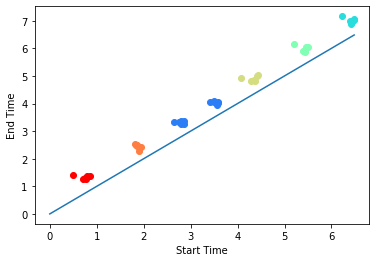

In [ ]:
label_clusters(MeanShift_Builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")


0.8166798944506968 0.7350119050056271
0.4085367253675731
[0 5 1 0 4 3 1 2 2 4 0 7 6 0 2 3 7 1 5 0 0 3 1]
[0 5 1 0 4 3 1 2 2 4 0 7 6 0 2 3 7 1 5 0 0 3 1]
adverage cluster size:  3.0
adverage unqiue users per cluster size:  2.7142857142857144
Total Users:  6
slope: 1


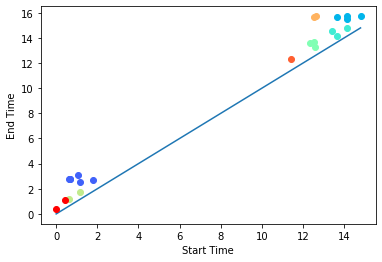

In [ ]:
label_clusters(MeanShift_Builder, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

0.7403599732562529 0.6663239759306276
0.0
[3 4 1 4 1 2 3 0 2 0 1 5]
[3 4 1 4 1 2 3 0 2 0 1 5]
adverage cluster size:  2.2
adverage unqiue users per cluster size:  2.0
Total Users:  4
slope: 1


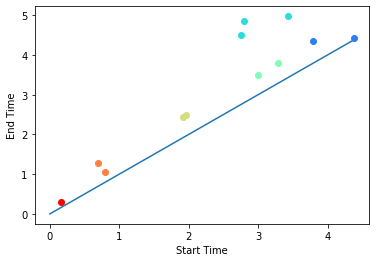

In [ ]:
label_clusters(MeanShift_Builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

Mean Shift typically produced less reliable results from DBSCAN

In [ ]:
def OPTICS_BUILDER(data = None, distance = 1, users = None, agreement = 0.5):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    dists_raw = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      skip = True
      for index, row in user_labels.iterrows():
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        dist = distance_cal(s1,e1,s2,e2)
        if (not skip):
          dists_raw.append(dist)
        
        skip = False
        s1 = s2
        e1 = e2
      adv_distance.extend(dists_raw)
    adv_distance = statistics.median(adv_distance)#min(adv_distance) #
    print(adv_distance, adv_distance * 0.9)
    return OPTICS(min_samples=round(len(users)*1/2), max_eps=adv_distance*1/2)


1.6162487958232175 1.4546239162408958
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


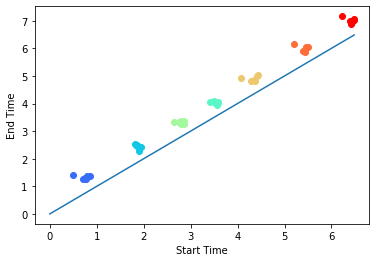

In [ ]:
label_clusters(OPTICS_BUILDER, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

16.45327541403231 14.807947872629079
[0 1 1 0 0 2 1 1 1 0 0 0 2 0 1 2 0 1 1 0 0 2 1]
[0 1 1 0 0 2 1 1 1 0 0 0 2 0 1 2 0 1 1 0 0 2 1]
adverage cluster size:  9.5
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


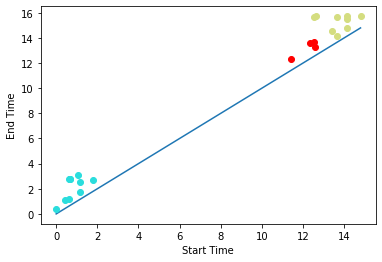

In [ ]:
label_clusters(OPTICS_BUILDER, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

1.7776224711675985 1.5998602240508386
[ 0  1  2  1  2  4  0  3  4  3  2 -1]
[ 0  1  2  1  2  4  0  3  4  3  2 -1]
adverage cluster size:  2.25
adverage unqiue users per cluster size:  2.0
Total Users:  4
slope: 1


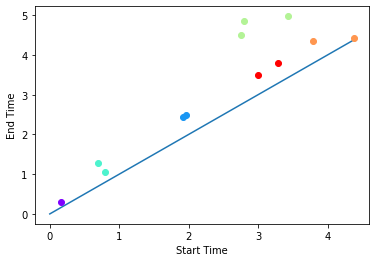

In [ ]:
label_clusters(OPTICS_BUILDER, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

In [ ]:
def DBSCAN_auto_dis_builder_min_dis2(data = None, distance = 1, users = None, agreement = 0.5):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    dists_raw = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      skip = False
      for index, row in user_labels.iterrows():
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        dist = distance_cal(s1,e1,s2,e2)
        if (not skip):
          dists_raw.append(dist)
        
        skip = False
        s1 = s2
        e1 = e2
    adv_distance = min(dists_raw) #* NEIGHBORHOOD_SCALAR #
    print(adv_distance)
    return DBSCAN(
                    eps=adv_distance * 0.9, 
                    min_samples=2,
                  
                  )

0.7403599732562529
[ 0  1  2  1  2  3  0  4  3  4  2 -1]
[ 0  1  2  1  2  3  0  4  3  4  2 -1]
adverage cluster size:  2.25
adverage unqiue users per cluster size:  2.25
Total Users:  4
slope: 1


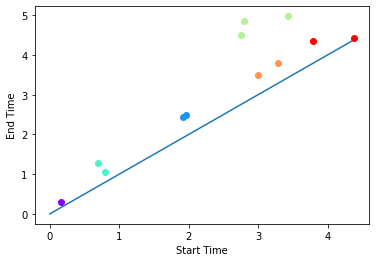

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

0.8166798944506968
[ 0  1  2  0 -1  3  2  4  2  5  0  5 -1  0  4  3 -1  2  1  0  0  3  2]
[ 0  1  2  0 -1  3  2  4  2  5  0  5 -1  0  4  3 -1  2  1  0  0  3  2]
adverage cluster size:  3.6
adverage unqiue users per cluster size:  3.4
Total Users:  6
slope: 1


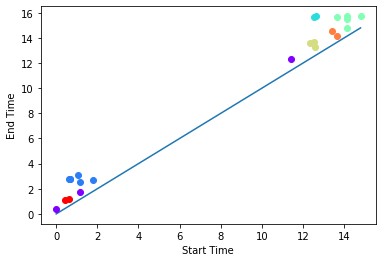

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

0.9791088856710474
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0
Total Users:  6
slope: 1


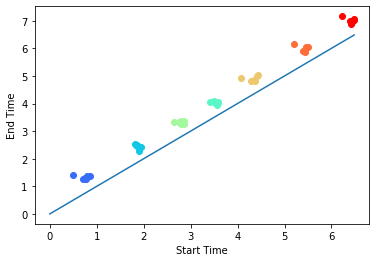

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

A Custom Clustering System:
- Round 1: Itertively minimize neighborhoods around each user's annotation such that each user's neighborhoods don't overlapp (Other user neighborhoods don't overlap either)
- Take smallest neighborhood size and redraw all neighborhoods
- Match with dBSCAN that way



Round 1: initalize each user to a unique cluster
- Round 2: Combine clusters in neighborhood via DBSCAN algoritm but the clusters should be ovalian in shape top to bottom
- 